<a href="https://colab.research.google.com/github/tobiasbudig/x-ray-chest-analysis/blob/master/mlp_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#hide
from fastbook import *
from fastai import *

In [7]:
!ls

drive  gdrive  sample_data


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.vision import *


Mounted at /content/gdrive


In [ ]:
from pathlib import Path

In [4]:
from google.colab import drive
drive.mount('/content/drive/')
src_path = '/content/drive/My Drive/Colab Notebooks/Copy of archive.zip'

Mounted at /content/drive/


In [5]:
!ls

drive  gdrive  sample_data


In [ ]:
import zipfile
src_path = '/content/drive/My Drive/Colab Notebooks/Copy of archive.zip'
dest_path = '/content/drive/My Drive/Colab Notebooks/'
with zipfile.ZipFile(src_path, 'r') as zip_ref:
    zip_ref.extractall(dest_path)

In [ ]:
Path.BASE_PATH = Path('/content/drive/My Drive/Colab Notebooks/chest_xray')
path = Path.BASE_PATH
Path.BASE_PATH.ls()

(#7) [Path('__MACOSX'),Path('pneumonia'),Path('normal'),Path('.DS_Store'),Path('test'),Path('train'),Path('export.pkl')]

In [ ]:
fns = get_image_files(path)
fns

NameError: ignored

In [ ]:
ds_tfms = get_transforms(do_flip=False, flip_vert=False, max_rotate= 15,max_zoom=1.1, max_lighting=0.2, max_warp=0.2)

NameError: ignored

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
data

NameError: ignored

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10


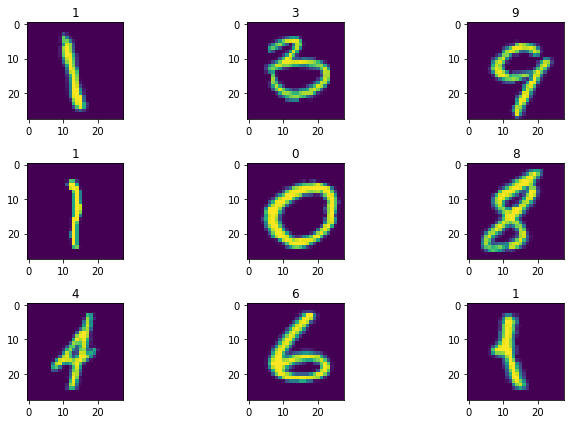

In [ ]:
print(data.classes) ## Prints class labels
print(data.c) ## Prints number of classes
data.show_batch(rows=3, figsize=(10,6), hide_axis=False) ## Show sample data

In [ ]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 512, bias=True) 
        self.lin2 = nn.Linear(512, 256, bias=True)
        self.lin3 = nn.Linear(256, 10, bias=True)

    def forward(self, xb):
        x = xb.view(-1,784) 
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        return self.lin3(x)

In [ ]:
## Defining the learner
mlp_learner = Learner(data=data, model=Mnist_NN(), loss_func=nn.CrossEntropyLoss(),metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


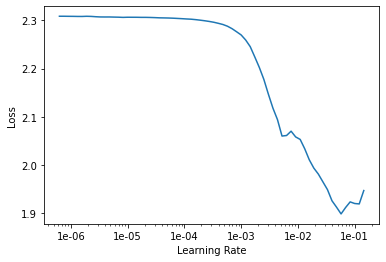

In [ ]:
## Finidng Ideal learning late
mlp_learner.lr_find()
mlp_learner.recorder.plot()

In [ ]:
mlp_learner.fit_one_cycle(5,1e-3)